### Author : A Aditya Bhardwaj
##### Date: 12th September 2022

Q1: Write a program to find the local extrema at
$$
f(x_1 , x_2) = x_1^3 + x_2^3 - 3x_1x_2 
$$
using Newton-Raphson Method

### Solution
First we will visualize the equation

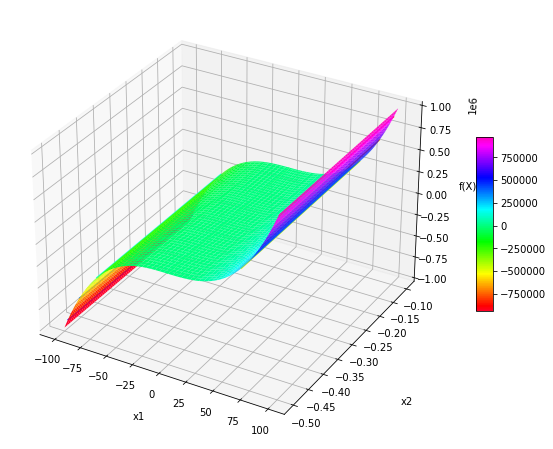

In [48]:
f = lambda x1,x2: x1**3 + x2**3 - 3*x1*x2
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-0.5,-0.1,100)
X, Y = np.meshgrid(x1,x2)
F = f(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d') # set up the axis as a 3D plot
surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
ax.contour(X, Y, F, cmap ='jet')
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)

plt.show()

Let us find the $\Delta f(x)$ and equate it to zero
$$
\Delta f(x) = 0
$$

In [49]:
from sympy import symbols, diff
import numpy as np 

def grad_f():
    x, y = symbols('x y', real = True)
    f = x**3 + y**3 - 3*x*y
    grad_f_trans = [diff(f,x),diff(f,y)]
    return np.array(grad_f_trans)

Next step is to find the Jacobi Matrix

In [50]:
def jacobi():        #takes grad_f_trans as an input
    gf = grad_f()
    x, y = symbols('x y', real = True)
    j_matrix = [[diff(gf[0],x), diff(gf[0],y)],[diff(gf[1],x), diff(gf[1],y)]]
    return np.array(j_matrix)

Now lets write the Multivariate Newton-Raphson Method 

In [51]:
def N_R_Method():    #takes j_matrix as an input
    x0 = np.array([3,4])
    gf_trans = grad_f()
    jacobi_M = jacobi()
    x, y = symbols('x y', real = True)
    jacobi_M = [[jacobi_M[0][0].subs(x, x0[0]).subs(y, x0[1]), 
                 jacobi_M[0][1].subs(x,x0[0]).subs(y,x0[1])],
                [jacobi_M[1][0].subs(x,x0[0]).subs(y,x0[1]),
                 jacobi_M[1][1].subs(x,x0[0]).subs(y,x0[1])]]
    
    jacobi_M = np.array(jacobi_M)
    jacobi_M = np.float64(jacobi_M)
    jacobi_M_inv = np.linalg.inv(jacobi_M)
    
    e = 1
    while(e > 0.00001):
        x, y = symbols('x y', real = True)
        g_x0 = [gf_trans[0].subs(x,x0[0]).subs(y,x0[1]),
                gf_trans[1].subs(x,x0[0]).subs(y,x0[1])]
        g_x0 = np.array(g_x0)
        x1 = np.subtract(x0,np.matmul(jacobi_M_inv, g_x0))
        m = np.linalg.norm(np.array(x0, dtype=float))
        n = np.linalg.norm(np.array(x1, dtype=float))
        e = m-n
        x0 = x1
    return x0

In [52]:
ans = N_R_Method()
ans

array([1.00003035093241, 1.00003688435234], dtype=object)

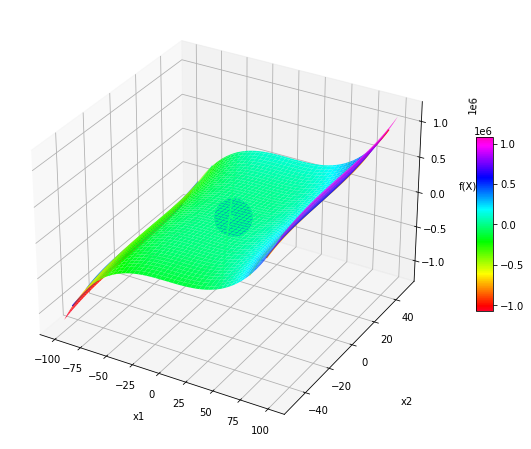

In [53]:
f = lambda x1,x2: x1**3 + x2**3 - 3*x1*x2
x1 = np.linspace(-100,100,100)
x2 = np.linspace(-50,50,100)
X, Y = np.meshgrid(x1,x2)
F = f(X,Y)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(projection='3d') # set up the axis as a 3D plot
surf = ax.plot_surface(X,Y,F, cmap= 'gist_rainbow')
fig.colorbar(surf,shrink=0.4, aspect=10)
ax.contour(X, Y, F, cmap ='jet')
# set axes label
ax.set_xlabel('x1', labelpad=10)
ax.set_ylabel('x2', labelpad=30)
ax.set_zlabel('f(X)', labelpad=10)
fz = f(ans[0], ans[1])
ax.scatter(ans[0], ans[1],fz, "*",s=1400,c='b')

plt.show()

Hence, we conclude that $[0,0]$ is the point at which the function is maximum

## Golden Section Method

In [54]:
def f(x):
    if(0 <= x and x <= 2):
        return 4*x
    elif(2 <= x and x <= 4):
        return 4-x

In [55]:
def G_S_Method(xr, xl):
    e = abs(xr - xl)
    while(e > 0.0001):
        x1 = xr - 0.618*(xr - xl)
        x2 = xl + 0.618*(xr - xl)
        if(f(x1) < f(x2)):
            xl = x1
        elif(f(x1) > f(x2)):
            xr = x2
        else:
            xl = x1
            xr = x2
        I = [xl ,xr]
        e = abs(xr - xl)
        if(I[0] > I[1]):
            temp = I[0]
            I[0] = I[1]
            I[1] = temp
    return I

In [56]:
ans2 = G_S_Method(0,4)    
maximum = (ans2[0]+ans2[1])/2
f_max = f(maximum)
ans2

[1.9999432745572725, 2.0000056185938986]

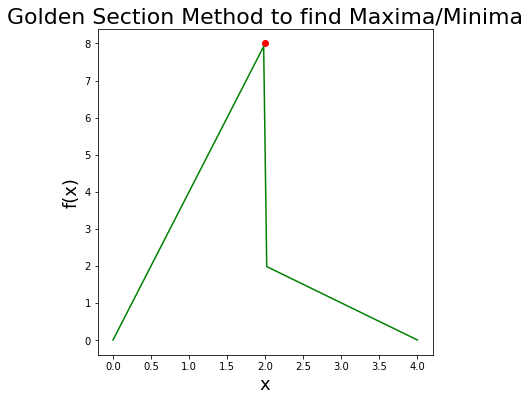

In [57]:
import matplotlib.pyplot as plt
x = np.linspace(0,4,100)
y = []
for i in range(len(x)):
    y.append(f(x[i]))
    
plt.figure(figsize=(6,6))
plt.plot(x,y,color='green')
plt.xlabel('x',fontsize=18)
plt.ylabel('f(x)',fontsize=18)
plt.title('Golden Section Method to find Maxima/Minima',fontsize=22)
plt.scatter(maximum,f_max,color='red')
plt.show()

## Gradiant Search

In [58]:
from sympy import symbols, diff
import numpy as np
def gradient_f(x0):
    x = symbols('x', real = True)
    f = (x+5)**2
    grad_f_trans = diff(f,x)    
    gf = grad_f_trans.subs(x, x0)
    return np.array(gf)

In [59]:
def Gradiant_Search(x_init):
    f = lambda x: (x+5)**2 # our function
    curr_x = x_init # The algorithm starts at x=3
    r = 0.01 # Learning rate
    error = 0.000001 #This tells us when to stop the algorithm
    e = 1 # error
    itr = 10000 # maximum number of iterations
    count = 0 #iteration counter

    while e > error and count < itr:
        prev_x = curr_x #Store current x value in prev_x
        curr_x = curr_x - r * gradient_f(prev_x) #Grad descent
        e = abs(curr_x - prev_x) #Change in x
        count = count+1 #iteration count

    print("The local minimum occurs at", curr_x)
    return curr_x

In [60]:
Gradiant_Search(3)

The local minimum occurs at -4.99995184903182


-4.99995184903182

The local minimum occurs at -4.99995184903182


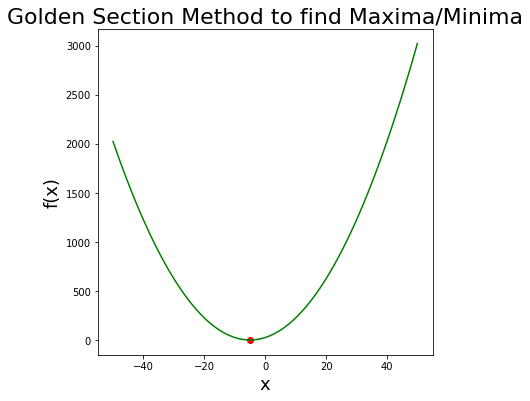

In [61]:
import matplotlib.pyplot as plt
f = lambda x: (x+5)**2 # our function
x = np.linspace(-50,50,100)
y = []
for i in range(len(x)):
    y.append(f(x[i]))

gs = Gradiant_Search(3)
f_gs = f(gs)

plt.figure(figsize=(6,6))
plt.plot(x,y,color='green')
plt.xlabel('x',fontsize=18)
plt.ylabel('f(x)',fontsize=18)
plt.title('Golden Section Method to find Maxima/Minima',fontsize=22)
plt.scatter(gs,f_gs,color='red')
plt.show()